# Enunciado

Desejamos fazer uma análise do desempenho dos estudantes de um determinado curso. Os dados de entrada contêm o
nome do aluno e duas notas correspondente as duas avaliações realizadas.
Escreva um programa que:

- Informe o número de alunos aprovados, reprovados e que devem realizar exame no curso, sabendo que
alunos com média (aritmética) maior ou igual a 7 estão aprovados, abaixo de 4 estão reprovados e os demais
devem realizar exame;
- Informe o nome do aluno que obteve a maior e a menor nota final no curso (se houver mais de um aluno
com a mesma nota basta informar um nome);
- Informe o número de alunos que tiveram nota acima da média na primeira avaliação;
- Apresente um histograma da segunda avaliação. Um histograma mostra graficamente o número de alunos
que obtiveram nota em cada um dos intervalos: [O a 0.9; I a 1.9; 2 a 2.9; .
, 8a 8.9; 9 a 10].

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.interactive(True)

In [13]:
# -----------------------------------------------------------
# Leitura do arquivo csv com as notas
# -----------------------------------------------------------
alunos = []
with open("2. alunos.csv") as csv:
    csv.readline()
    for line in csv:
        line = line.split(";")
        nome = line[0]
        e1 = float(line[1].replace(",", "."))
        e2 = float(line[2].replace(",", "."))
        alunos.append([nome, e1, e2])

In [14]:
# -----------------------------------------------------------
# Número de alunos aprovados, reprovados e em exame.
# -----------------------------------------------------------
aprovados = 0
reprovados = 0
em_exame = 0

for aluno in alunos:
    # Calcula a média para cada aluno
    media = (aluno[1] + aluno[2]) / 2
    # Adiciona ao final da lista de cada aluno e valor da média
    aluno.append(media)

    # Se maior|igual que 7               -> Aprovado
    # Se maior|igual que 4 e menor que 7 -> Em exame
    # Senão (menor que 4)                -> Reprovado
    if media >= 7:
        aprovados += 1
    elif media >= 4:
        em_exame += 1
    else:
        reprovados += 1

print(f"Aprovados:  {aprovados}")
print(f"Em exame:   {em_exame}")
print(f"Reprovados: {reprovados}")

Aprovados:  23
Em exame:   8
Reprovados: 4


In [15]:
# -----------------------------------------------------------
# Nome do aluno com maior e menor notal final.
# -----------------------------------------------------------

# Inicialização das listas que receberão as informações de nome e nota
# do aluno que teve a maior e menor média final
maior_media = ["", 0]
menor_media = ["", 10]

for aluno in alunos:
    # aluno[3] contém a média final do curso
    if aluno[3] > maior_media[1]:
        maior_media = [aluno[0], aluno[3]]

    if aluno[3] < menor_media[1]:
        menor_media = [aluno[0], aluno[3]]

print(f"Aluno com a MAIOR média: {maior_media[0]}")
print(f"Aluno com a MENOR média: {menor_media[0]}")

Aluno com a MAIOR média: THALES
Aluno com a MENOR média: GUILHERME


In [18]:
# -----------------------------------------------------------
# Número de alunos ACIMA da média na 1a avaliação.
# -----------------------------------------------------------
alunos_acima_da_media = sum(aluno[1] > 7 for aluno in alunos)

print(f"Número de alunos ACIMA da média na 1a avaliação: {alunos_acima_da_media}")

Número de alunos ACIMA da média na 1a avaliação: 25


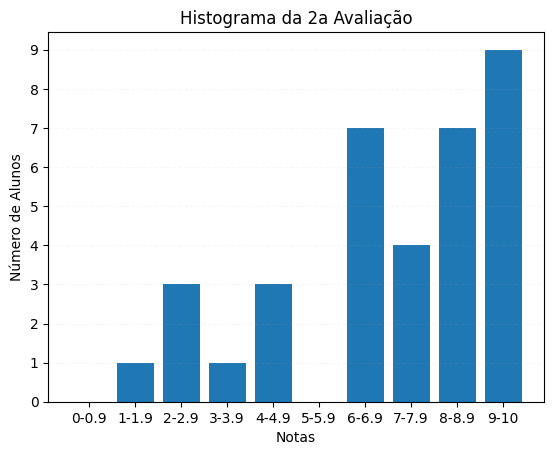

In [17]:
# -----------------------------------------------------------
# Histograma da 2a avaliação.
# -----------------------------------------------------------

# Intervalos determinados
intervalos = ["0-0.9", "1-1.9", "2-2.9", "3-3.9", "4-4.9", "5-5.9", "6-6.9", "7-7.9", "8-8.9", "9-10"]

# Lista para as contagens, onde cada posição correponde a um intervalo
notas = [0] * len(intervalos)

for aluno in alunos:
    # aluno[2] contém as notas da Av 2
    # Entre 0 e 0.9
    if 0 <= aluno[2] < 1:
        notas[0] += 1
    elif aluno[2] < 2:
        notas[1] += 1
    elif aluno[2] < 3:
        notas[2] += 1
    elif aluno[2] < 4:
        notas[3] += 1
    elif aluno[2] < 5:
        notas[4] += 1
    elif aluno[2] < 6:
        notas[5] += 1
    elif aluno[2] < 7:
        notas[6] += 1
    elif aluno[2] < 8:
        notas[7] += 1
    elif aluno[2] < 9:
        notas[8] += 1
    else:
        notas[9] += 1

# Plot do gráfico
plt.bar(intervalos, notas, 0.8)
plt.title("Histograma da 2a Avaliação")
plt.xlabel("Notas")
plt.ylabel("Número de Alunos")
plt.yticks(range(10))
plt.grid(axis="y", linestyle="--", alpha=0.1)
plt.show()
